In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=2)

In [3]:
X = np.random.rand(500, 50) + np.random.randn(500, 50)*0.2
X[:,0] = 1.

In [4]:
beta = np.random.randn(50)*5
idx = np.random.randint(0, 50, size=20)
beta[idx] = 0.
print(beta)

[  0.     0.     0.    -4.97   0.     0.    -0.87   0.     0.     7.01
  -3.77   0.     0.18  -6.97 -11.2    8.87  -1.48  -1.46   0.    -4.28
   1.92  -6.74   0.82  -0.64   0.    -0.95   5.63  -5.73   0.27   0.
   2.52   0.    -4.52   0.5  -11.85   1.47   6.13  -1.99   2.92   0.
   2.26   0.     0.    -1.23   2.22   0.    -3.73  -5.32   0.    -2.45]


In [5]:
y = X.dot(beta) + np.random.randn(500)*10.

## backward stepwise regression

In [6]:
def move_feature(undropped_features, dropped_features, feature):
    undropped_features.remove(feature)
    dropped_features.append(feature)

def backward_step(X, y, undropped_features, verbose_level):
    X = np.column_stack([X[:,i] for i in undropped_features])
    A = np.linalg.inv(X.T.dot(X))
    H = X.dot(A).dot(X.T)
    r = y - H.dot(y)
    left_vec = X.T.dot(2*r + y)
    right_vec = X.T.dot(y)

    min_dRSS = np.inf
    best_i = -1
    for i, drop_feature in enumerate(undropped_features):
        if i==0:
            continue
        b = A[:,i]
        v = A[i,i]
        dRSS = (left_vec.dot(b)) * right_vec.dot(b) / v
        if dRSS < min_dRSS:
            min_dRSS = dRSS
            best_i = i
    return undropped_features[best_i], min_dRSS
    

def backward_stepwise_regression(X, y, beta=None, verbose_level=0):
    N, p = X.shape
    undropped_features = list(range(p))
    dropped_features = []
    rss_list = []
    H = X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)
    y_hat = H.dot(y)
    rss = (y - y_hat).dot(y - y_hat)
    rss_list.append(rss)

    for i in range(p-1):
        drop_feature, dRSS = backward_step(X, y, undropped_features, verbose_level)
        move_feature(undropped_features, dropped_features, drop_feature)

        rss_list.append(rss_list[-1]+dRSS)
    return rss_list, dropped_features

In [7]:
rss_list, dropped_features = backward_stepwise_regression(X, y, beta, verbose_level=1)

In [8]:
dropped_features[:10]

[28, 11, 7, 17, 39, 20, 24, 29, 4, 45]

In [11]:
beta[dropped_features]

array([  0.27,   0.  ,   0.  ,  -1.46,   0.  ,   1.92,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,  -0.64,   0.  ,  -0.87,   1.47,
        -2.45,   0.  ,   0.82,   0.  ,   0.  ,   0.  ,  -1.99,  -0.95,
         0.  ,   2.26,   0.  ,   2.52,   0.18,   2.22,   0.5 ,   2.92,
        -4.28,  -1.23,   5.63,  -5.73,  -4.97,  -4.52,  -3.73,  -6.97,
        -1.48,  -5.32,  -3.77,  -6.74,   7.01,   6.13,   8.87, -11.2 ,
       -11.85])

Text(0.5, 0, 'number of dropped features')

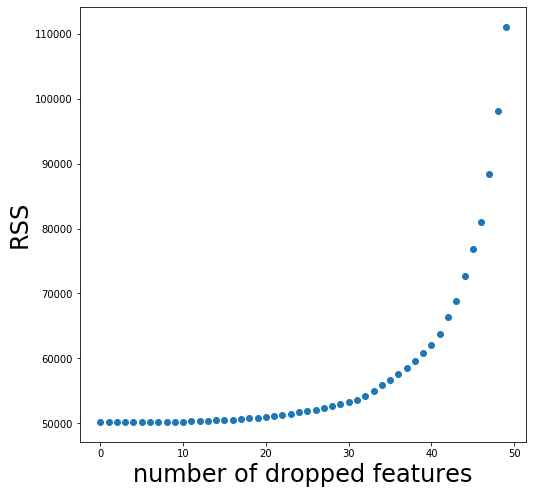

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(range(len(rss_list)), rss_list)
plt.ylabel('RSS', fontsize=24)
plt.xlabel('number of dropped features', fontsize=24)